# Exploration Data Analysis on Vehicle Recalls

**Author:** Harris Zheng

**Date:** February 27th, 2025

## Imports

In [240]:
import pandas as pd
import pprint
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import os
import string
import re


In [241]:
PARENT_DIR = os.getcwd().rsplit("\\", maxsplit=1)[0]
DATASET_DIR = os.path.join(PARENT_DIR, "Datasets")

In [242]:
df = pd.read_csv(f"{DATASET_DIR}/FLAT_RCL.txt", sep='\t', header=None, on_bad_lines='skip')
# use the column names listed above
df.columns = ['RECORD_ID', 'CAMPNO', 'MAKETXT', 'MODELTXT', 'YEARTXT', 'MFGCAMPNO', 'COMPNAME', 'MFGNAME', 'BGMAN', 'ENDMAN', 'RCLTYPECD', 'POTAFF', 'ODATE', 'INFLUENCED_BY', 'MFGTXT', 'RCDATE', 'DATEA', 'RPNO', 'FMVSS', 'DESC_DEFECT', 'CONSEQUENCE_DEFECT', 'CORRECTIVE_ACTION', 'NOTES', 'RCL_CMPT_ID', 'MFR_COMP_NAME', 'MFR_COMP_DESC', 'MFR_COMP_PTNO']
df.head()

C:\Users\harri\AppData\Local\Temp\ipykernel_24120\90671655.py:1: DtypeWarning: Columns (17,18,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{DATASET_DIR}/FLAT_RCL.txt", sep='\t', header=None, on_bad_lines='skip')


,RECORD_ID,CAMPNO,MAKETXT,MODELTXT,YEARTXT,MFGCAMPNO,COMPNAME,MFGNAME,BGMAN,ENDMAN,...,RPNO,FMVSS,DESC_DEFECT,CONSEQUENCE_DEFECT,CORRECTIVE_ACTION,NOTES,RCL_CMPT_ID,MFR_COMP_NAME,MFR_COMP_DESC,MFR_COMP_PTNO
0,1,02V288000,FORD,FOCUS,2000,02S41,ELECTRICAL SYSTEM:12V/24V/48V BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,...,NaN,NaN,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFE...,000015339000215021000000202,NaN,NaN,NaN
1,2,02V288000,FORD,FOCUS,2001,02S41,ELECTRICAL SYSTEM:12V/24V/48V BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,...,NaN,NaN,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFE...,000015339000215022000000202,NaN,NaN,NaN
2,3,02V236000,JAYCO,FT EAGLE 10 SG,2003,NaN,EQUIPMENT:OTHER:LABELS,"JAYCO, INC.",20020730.0,20020813.0,...,NaN,NaN,"ON CERTAIN FOLDING TENT CAMPERS, THE FEDERAL C...","IF THE TIRES WERE INFLATED TO 80 PSI, THEY COU...",OWNERS WILL BE MAILED CORRECT LABELS FOR INSTA...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015210000106403000000349,NaN,NaN,NaN
3,4,02V237000,HOLIDAY RAMBLER,ENDEAVOR,2000,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000083965000000272,NaN,NaN,NaN
4,5,02V237000,HOLIDAY RAMBLER,ENDEAVOR,1999,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000080938000000272,NaN,NaN,NaN


## Descriptive Summary

In [243]:
len(df)

293171

In [244]:
df.dtypes

RECORD_ID               int64
CAMPNO                 object
MAKETXT                object
MODELTXT               object
YEARTXT                 int64
MFGCAMPNO              object
COMPNAME               object
MFGNAME                object
BGMAN                 float64
ENDMAN                float64
RCLTYPECD              object
POTAFF                float64
ODATE                 float64
INFLUENCED_BY          object
MFGTXT                 object
RCDATE                  int64
DATEA                   int64
RPNO                   object
FMVSS                  object
DESC_DEFECT            object
CONSEQUENCE_DEFECT     object
CORRECTIVE_ACTION      object
NOTES                  object
RCL_CMPT_ID            object
MFR_COMP_NAME          object
MFR_COMP_DESC          object
MFR_COMP_PTNO          object
dtype: object

**Interesting Columns:**
POTAFF = Potential Affected Units
DESC_DEFECT = Description of Defect
CONSEQUENCE_DEFECT = Consequence of Defect
CORRECTIVE_ACTION = Corrective Action
NOTES = Notes

In [245]:
df.describe()

,RECORD_ID,YEARTXT,BGMAN,ENDMAN,POTAFF,ODATE,RCDATE,DATEA
count,293171.000000,293171.000000,1.213470e+05,1.215890e+05,2.928850e+05,2.804070e+05,2.931710e+05,2.931710e+05
mean,146587.072258,2828.429275,2.002491e+07,2.005949e+07,2.867357e+05,2.013967e+07,2.013514e+07,2.013729e+07
std,84632.515632,2422.611396,1.423301e+05,1.492394e+05,7.466108e+05,1.864228e+05,1.262811e+05,1.197836e+05
min,1.000000,1949.000000,2.090211e+06,2.040211e+06,0.000000e+00,1.111111e+07,1.966012e+07,1.979101e+07
25%,73293.500000,2006.000000,1.997010e+07,1.999123e+07,7.420000e+02,2.009073e+07,2.008072e+07,2.008072e+07
50%,146586.000000,2017.000000,2.005040e+07,2.008113e+07,1.219600e+04,2.020063e+07,2.019122e+07,2.019122e+07
75%,219881.500000,2021.000000,2.011113e+07,2.015071e+07,2.427220e+05,2.022071e+07,2.022052e+07,2.022052e+07
max,293174.000000,9999.000000,3.019051e+07,3.019043e+07,3.200000e+07,2.025022e+07,2.025022e+07,2.025022e+07


## Utilities

In [246]:
def get_random_row(df : pd.DataFrame):
    rand_row = df.sample().iloc[0]
    print("RECORD_ID:", rand_row["RECORD_ID"])
    pprint.pprint(f"COMPNAME: {rand_row['COMPNAME']}")
    pprint.pprint(f"DESC_DEFECT: {rand_row['DESC_DEFECT']}")
    pprint.pprint(f"CONSEQUENCE_DEFECT: {rand_row['CONSEQUENCE_DEFECT']}")
    pprint.pprint(f"CORRECTIVE_ACTION: {rand_row['CORRECTIVE_ACTION']}")
    pprint.pprint(f"NOTES: {rand_row['NOTES']}")

## Data Exploration

### Sampling

Sample some rows

In [247]:
ign = (df["DESC_DEFECT"].str.lower().str.contains("loose bolt").fillna(False))

C:\Users\harri\AppData\Local\Temp\ipykernel_24120\103415458.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ign = (df["DESC_DEFECT"].str.lower().str.contains("loose bolt").fillna(False))


In [248]:
get_random_row(df.loc[ign])

RECORD_ID: 241871
'COMPNAME: POWER TRAIN:AUTOMATIC TRANSMISSION'
('DESC_DEFECT: Ford Motor Company (Ford) is recalling certain 2022-2023 F-150, '
 'Mustang, Explorer, Bronco, and 2023 Lincoln Aviator vehicles equipped with '
 'automatic transmissions.  The transmission may contain a loose bolt which '
 'could prevent the transmission from engaging the park gear, although the '
 'gear shifter position may indicate that the vehicle has been shifted to '
 '"PARK."')
('CONSEQUENCE_DEFECT: The inability to secure the vehicle in the park position '
 'can result in a rollaway, increasing the risk of a crash or injury.')
('CORRECTIVE_ACTION: Dealers will inspect and, if necessary, replace the '
 'transmissions, free of charge.  Owner notification letters were mailed April '
 '25, 2023.  Owners may contact Ford customer service at 1-866-436-7332.  '
 "Ford's number for this recall is 23S06.  ")
('NOTES: Owners may also contact the National Highway Traffic Safety '
 'Administration Vehicle Safet

In [249]:
get_random_row(df.loc[df["COMPNAME"].str.lower().str.contains("electrical")])

RECORD_ID: 179951
'COMPNAME: ELECTRICAL SYSTEM:WIRING'
('DESC_DEFECT: Corp. Micro Bird, Inc. (Micro Bird) is recalling certain '
 '2013-2021 Micro Bird G5 school buses with electrical wiring, routed behind '
 "the driver's seat, that may have been damaged during rivet installation.")
('CONSEQUENCE_DEFECT: If the electric cabling is damaged, certain safety '
 'accessories or lamps may stop working, or a short-circuit may occur, '
 'increasing the risk of a fire.   ')
('CORRECTIVE_ACTION: Micro Bird will notify owners and dealers will provide '
 'field modification instructions, free of charge.  The recall is expected to '
 'begin March 22, 2021.  Owners may contact Micro Bird customer service at '
 "1-819-477-2012.  Micro Bird's number for this recall is 21-086-WUC. ")
('NOTES: Owners may also contact the National Highway Traffic Safety '
 'Administration Vehicle Safety Hotline at 1-888-327-4236 (TTY '
 '1-800-424-9153), or go to www.safercar.gov. ')


In [250]:
get_random_row(df)

RECORD_ID: 283933
'COMPNAME: TIRES:MARKINGS'
('DESC_DEFECT: Prinx Chengshan Tire North America, Inc. (PCTNA) is recalling '
 'certain Fortune Tormenta and Prinx Hicountry sold as replacements tires.  '
 'Please refer to the 573 Safety Report for specific sizes.  The tires are '
 'labeled as snow tires, but do not have sufficient traction to perform in all '
 'snow weather conditions.  As such, these tires fail to comply with the '
 'requirements of Federal Motor Vehicle Safety Standard number 139, "New '
 'Pneumatic Radial Tires for Light Vehicles." ')
('CONSEQUENCE_DEFECT: Tires that do not provide sufficient traction in snow '
 'can increase the risk of a crash. ')
('CORRECTIVE_ACTION: Dealers will inspect and repair, or fully reimburse '
 'customers as necessary, free of charge.  Owner notification letters were '
 'mailed January 27, 2025.  Owners may contact PCTNA customer service at '
 '1-855-544-4891. ')
('NOTES: Owners may also contact the National Highway Traffic Safety '
 'Adm

## Null Hypothesis: Exact Match is Good Enough

LDA and Wordcloud will help me explore semantic relationships in the dataset columns: ["COMPNAME", "DESC EFFECT", "CONSEQUENCE_DEFECT", "CORRECTIVE_ACTION", "NOTES"]. If they don't exist, then we can rely on exact match for information retrieval.

## Wordcloud Plotting

In [251]:
from wordcloud import WordCloud
import spacy

In [252]:
# Not yet time for SpaCy Tokenization.
# SpaCy Tokenization is better than NLTK: 
# https://medium.com/towards-data-science/hands-on-implementation-of-basic-nlp-techniques-nltk-or-spacy-687099e02816
nlp = spacy.load('en_core_web_sm')

In [253]:
def generate_word_frequencies_from_column(df, column):
    # Find all words in the column
    all_words = df[column].str.findall("\\b\\w\\w+\\b").explode(column)

    # Get word counts. We have column in column string for word and column 'count' for frequency 
    word_frequencies = all_words.value_counts().reset_index()
    word_frequencies[column] = word_frequencies[column].str.lower() # lower case

    # Remove stopwords and words which do not contain letters (ex. 2016, 2017, 2018)
    uninterested_words_filter = (
        (word_frequencies[column].isin(nlp.Defaults.stop_words)) |
        ~(word_frequencies[column].str.contains("[a-zA-Z]"))
    )
    word_frequencies = word_frequencies.loc[
        ~uninterested_words_filter
    ]
    escaped_puncs = re.escape(string.punctuation)
    # There should be no punctuations present in any of the words
    assert len(
        word_frequencies[word_frequencies[column].str.contains('|'.join(escaped_puncs.split()))]
    ) == 0, \
    "There should be no punctuations in the analyzed words"
    return word_frequencies.set_index(column)


### COMPNAME Distribution

Name of component with defect

In [254]:
compname_word_freq = generate_word_frequencies_from_column(df, "COMPNAME")

In [255]:
compname_word_freq = compname_word_freq[~(compname_word_freq.index.isin(["system", "equipment"]))]

In [256]:
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='white',
                collocations=False,
                relative_scaling=0.75, # Ranges from 0-1. 
                                       # =0.75 weights word size by frequency moreso than word rank
                min_font_size = 10).generate_from_frequencies(compname_word_freq.to_dict()["count"])

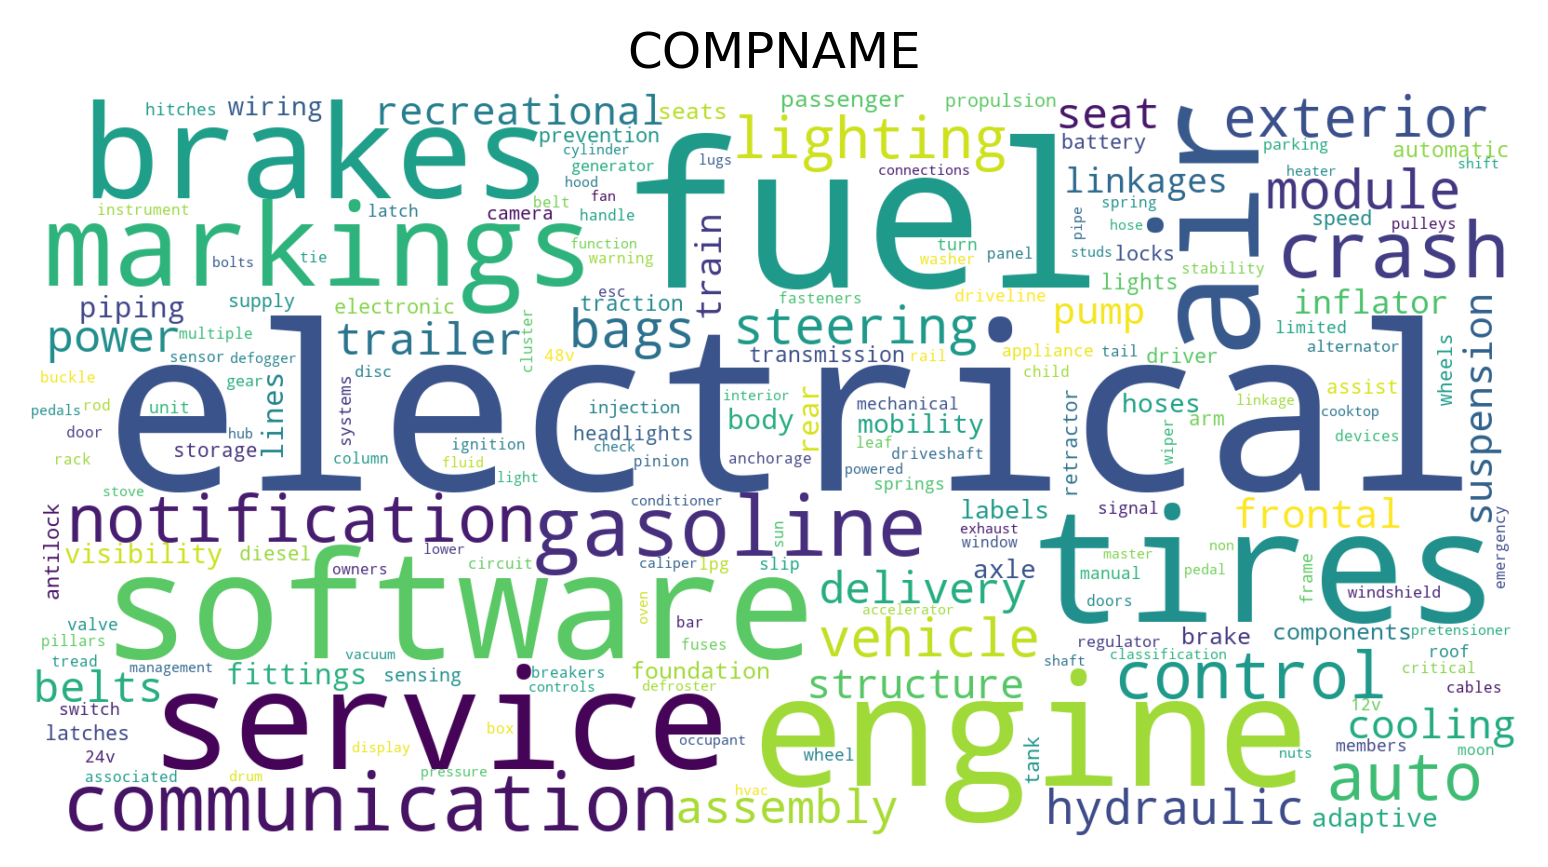

In [257]:
plt.figure(dpi=300)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
_ = plt.title('COMPNAME')

Clear categories of issues visible: Fuel, engine, electrical, software, air, gasoline, seat, brakes.

Note that some issues are directly observable to the human senses, such as fuel and seat problems, but electrical and software issues are most likely identified through other observations, such vehicle stalling, or door opening while child safety lock is on.

Some examples of observable issues linked to deeper root causes that I can think of, with the help of wordmap:
 - Air bag issues can be observed due to faulty electrical and seatbelt sensors.
 - Bad smell can be observed due to break pads overheating.
 - Overheating can be observed due to power train issues.
 - Door open/close issues can be observed due to door latch issue, child safety mode malfunctions.
 - Harsh clutch movements can be observed due to transmission/powertrain issues.
 - Steering wheel issues can be observed due to unbalanced tires.
 - Seat adjustment issues can be observed due to debri in seat latch.
 - Light issues can be observed due to faulty electrical sensors.

In [258]:
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='white',
                regexp="\\b\\w\\w+\\b",
                include_numbers=False,
                collocations=True,
                stopwords=nlp.Defaults.stop_words,
                collocation_threshold=-999,
                relative_scaling=1, # Ranges from 0-1. 
                                       # =0.75 weights word size by frequency moreso than word rank
                min_font_size = 10).generate(df["COMPNAME"].str.cat(sep=" "))

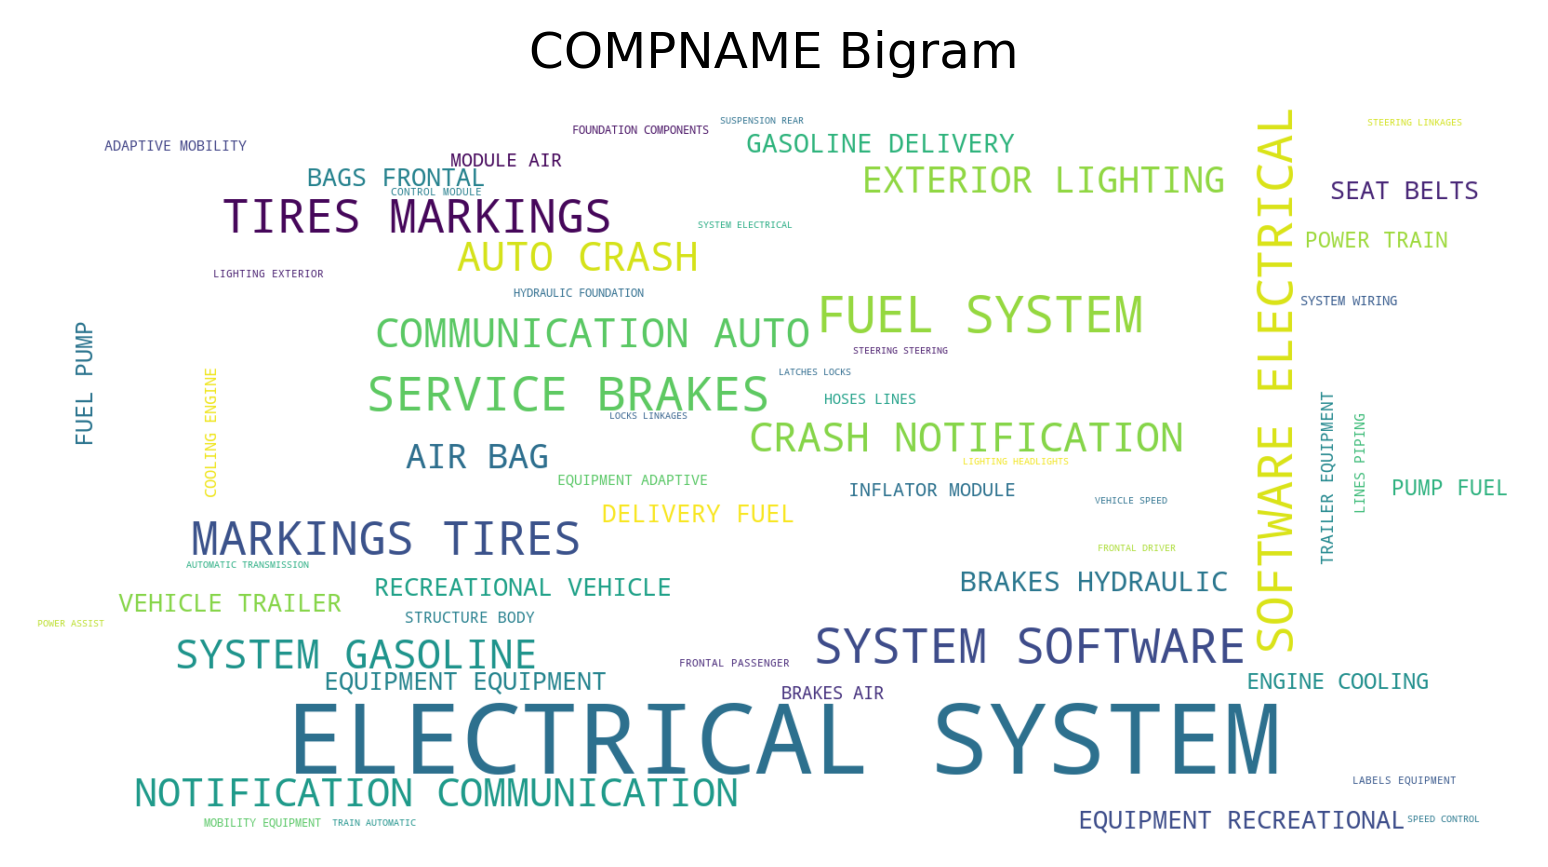

In [259]:
plt.figure(dpi=300)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
_ = plt.title('COMPNAME Bigram')

**I reject my null hypothesis.** I think the exact match is out of the question here, because if a user were to query for recall information, representing it using exact words will not lead to matches for the user.

For example, an exact word matching algorithm will not return recall related to "electrical system issues" from a user query such as "vehicle stalling".

### DESC_DEFECT Wordmap (Work in Progress)



In [260]:
rand_record = df["DESC_DEFECT"].sample(random_state=42)

In [261]:
rand_record_words = rand_record.str.findall("\\b\\w\\w+\\b").explode("DESC_DEFECT")

In [262]:
rand_record_words.iloc[15]

'Class'

In [263]:
pprint.pprint(
    rand_record.iloc[0]
)

('Mercedes-Benz USA, LLC (MBUSA) is recalling certain 2017-2022 CLA-Class, '
 'GLA-Class, GLE-Class, GLS-Class, SLC-Class, A-Class, AMG GT-Class, C-Class, '
 'E-Class, S-Class, SL-Class, GLC-Class, CLS-Class, GLB-Class, and G-Class '
 "vehicles.  Please refer to MBUSA's recall report for specific vehicle model "
 "details.  An error in the communication module's SIM card software can cause "
 'a mobile network connection failure, disabling the emergency call (eCall) '
 'system.')


In [264]:
all_words = df['DESC_DEFECT'].str.findall("\\b\\w\\w+\\b").explode("DESC_DEFECT")
word_frequencies = all_words.value_counts().reset_index()
word_frequencies.head()

,DESC_DEFECT,count
0,Class,528797
1,the,486579
2,and,371498
3,THE,288783
4,to,259472


In [265]:
word_frequencies["DESC_DEFECT"] = word_frequencies["DESC_DEFECT"].str.lower()
interested_words_filter = (
    (~word_frequencies["DESC_DEFECT"].isin(nlp.Defaults.stop_words)) &
    (word_frequencies["DESC_DEFECT"].str.contains("[a-zA-Z]"))
)
word_frequencies = word_frequencies.loc[
    interested_words_filter
]

In [266]:
escaped_puncs = re.escape(string.punctuation)
# There should be no punctuations present in any of the words
assert len(
    word_frequencies[word_frequencies["DESC_DEFECT"].str.contains('|'.join(escaped_puncs.split()))]
) == 0, \
"There should be no punctuations in the analyzed words"

word_frequencies_dict = word_frequencies.set_index("DESC_DEFECT").to_dict()["count"]

In [267]:
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='white',
                collocations=False,
                relative_scaling=0.75, # Ranges from 0-1. 
                                       # =0.75 weights word size by frequency moreso than word rank
                min_font_size = 10).generate_from_frequencies(word_frequencies_dict)

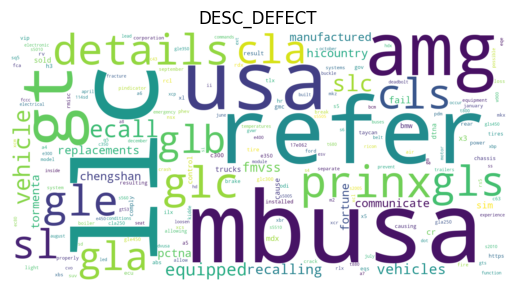

In [268]:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
_ = plt.title('DESC_DEFECT')

First sentence has a lot of junk information, like this manufacture is recalling specific make, specific class vehicles due to failure and failed some federal requirement. These may still useful pieces of information for retrieval of automotive issues but right now we want to prioritize understanding specific issues. 

As you can see above, even by removing stopwords and numbers (e.g. 2016, 2017) we still get a ton of information about vehicle classes.